A Transactive Energy system may use an Orderbook to implement a continuous market rather than a discrete-time double auction [1].  In an Orderbook, two lists of limit orders are maintained and market orders are filled in real-time.

Limit orders are used to inform the market of the availability of a resource to supply (sell or "ask" order) or consume (buy or "bid" order) a specified quantity of service at a specified price for a specified duration.  

Market orders are used to obtain from the market an immediate commitment of a resource to supply or consume at the best price possible at the present time.

This document describes the types of orders and the market mechanisms needed to implement a Transactive Orderbook.

# Market Units

Each Orderbook tracks a product or service specified as a "unit".  In this document, we will use the unit of megaWatt (denoted MW) in the examples.  However, other units may also be supported. Time duration units can also be specified, and this document will use the time unit "h" in the examples. The currency unit used is "$".

# Order Parameters
Orders have a number of parameters associated that are used to characterize them.

## Quantity
The quantity associated with a particular order is always given in the Orderbook's unit. If the quantity is divisible, the order must indicate that.

## Duration
Every order has duration associated with it over which the order is expected to be filled. If the duration is divisible, then the order must indicate that. 

The total amount traded is always for the order quantity multiplied by the order duration.

## Price
The price associated with an order is always given per unit quantity per unit time.

## Divisibility
Order may be filled using multiple orders. However, if a limit order cannot be filled immediately, a divisible order may be partly filled and the remainder of the order placed in the order book to be filled at the first opportunity.  To specify that an order must be filled in its entirety when it initially filled, it must be specified as indivisible by setting the divisibility flag to `False`.  By default sell orders are divisible, and buy orders are indivisible. Indivisible market order must be fully filled immediately in quantity but can be filled sequentially in time by different sell orders provided there are not gaps in filling the order in time.

## Amount
The order amount is the product of the quantity filled multiplied by the duration over which it has been filled. Any portion of the quantity or duration that remains unfilled is left in the quantity and duration. Note that the unfilled portion of an order is by definition the original quantity times the original duration less the amount. Thus quantity times duration may not fully reflect the remaining amount required if the order is divisible.

## Cost
The cost of an order is computed when the order is filled. The order cost is the total traded amount multiplied by the trade price.  The trade price is the price that clears the corresponding limit order, which may be different from the corresponding order price. A positive amount is associated with a sell order at a positive price, and negative amount is associated with a buy order at a positive price.  Note that negative prices are permitted, but represent a market pathology associated with insufficient resources.

# Limit Orders

There are two types of limit orders in an Orderbook system: Buy Limit and Sell Limit.

## Buy Limit
A Buy Limit is an order to buy only if one or more sellers can be found who are willing to deliver the given amount (the quantity multipled by the duration) at the given price. A buy limit order remains in the book until it is canceled or it expires.

## Sell Limit
A Sell Limit is an order to sell only if one or more buyers can be found who are willing to consume the given amount (quantity multiplied by duration) at the given price. A sell limit order remains in the book until it is canceled or it expires.

# Market Orders
There are two types of market orders in an Orderbook system: Buy Market and Sell Market.

## Buy Market
A Buy Market is an order to buy a given amount immediately at the best available price. If the order cannot be filled immediately, the order is canceled.

## Sell Market
A Sell Market is an order sell a given amount immediately at the best available price.  If the order cannot be filled immediately, the order is canceled.

# Filling Orders
Orders are filled when they are received, if possible. The disposition of orders that cannot be filled immediately depends on the type of order; a limit order is placed on the books while a market order is cancelled.

When an order is filled, the quantity, duration, price, and value are set and the order status data is returned to the agent. Depending on the order parameters, the order may not be filled completely, or the order may be canceled.

## Clearing Price
One important question is whether orders get filled as bid/ask or there is a formula for splitting the difference. If a cost-free central market clearing agent is used, then one can divide the difference equally so that $P_c=\frac{1}{2}(P_a+B_b)$. Alternatively, an arbitrary fraction of the difference can be paid to the market clearing agent. Another approach is to impose a fixed fee on both asks and bids to paid the market clearing agents regardless of the difference and divide the difference among the parties.

In an untrusted environment the preferred method is to pay as asked, charge as bid, and deliver the difference as payment to the first $\frac{N}{2}+1$ agents that correctly solve the market clearing problem. Thus the difference in ask/bid prices, if any, can be used to provide an incentive for agents to participate in a distributed market clearing system. On the one hand there is an incentive for agents to join in the clearing system, but on the other hand, if too many agents join, then the incentives diminishes to become infinitessimal.  In principle, an equilibrium is reached at which the cost of providing the service is slightly less than the revenue derived from it.

## Filling Limit Orders
A limit order is filled immediately if a matching limit order in the other book can be found.  For example, if a Sell Limit is received for a price less than or equal to the highest Buy Limit order, then the Sell Limit order is filled with the corresponding Buy Limit order.  If the order quantity is divisible, then this process is continued until the Sell Limit order is completely filled or there are no remaining Buy Limit orders that match at the given price. The balance of the limit order is left on the books to be filled at a later date. If the order quantity is not divisible, then the order must be filled completely, otherwise it must be placed in the book to be filled later.

### Examples
To run the python examples, you must load the `orderbook.py` module

In [1]:
import orderbook as ob

This example creates one order of each type. Note that by default sell orders are divisible and buy orders are not divisible. Also note that until the order are submitted to a market, they have not defined unit, time, or currency.

In [2]:
print(ob.order(order_type="BUYLIMIT",quantity=10.0,price=10.0,duration=1.0))
print(ob.order(order_type="SELLLIMIT",quantity=10.0,price=10.0,duration=1.0))
print(ob.order(order_type="BUYMARKET",quantity=5.0, duration=1.0))
print(ob.order(order_type="SELLMARKET",quantity=5.0, duration=1.0))
print(ob.order(order_type="CANCEL",quantity=1.0,duration=1.0))

<order:0/BUYLIMIT INDIVISIBLE 10.0 at 10.0 for 1.0>
<order:1/SELLLIMIT 10.0 at 10.0 for 1.0>
<order:2/BUYMARKET INDIVISIBLE 5.0 for 1.0>
<order:3/SELLMARKET 5.0 for 1.0>
<order:4/CANCEL 1.0 for 1.0>


This example builds buy and sell books and displays them visually.  The x-axis is the price, and the y-axis is the cumulative quantity.

{"buy": [{"quantity": 1.5, "duration": 1.0, "price": 8.0, "id": 8, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 1.0, "duration": 1.0, "price": 5.0, "id": 9, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 2.5, "duration": 1.0, "price": 2.0, "id": 10, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}], "sell": [{"quantity": 2.0, "duration": 1.0, "price": 10.0, "id": 5, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 1.0, "duration": 1.0, "price": 15.0, "id": 6, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 0.5, "duration": 1.0, "price": 20.0, "id": 7, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}], "unit": "MW", "time": "h", "currency": "$", "price": "$/MW.h", "using": {}, "fees": 0.0, "settled": []}


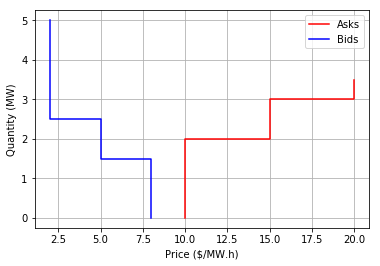

In [3]:
market = ob.orderbook()
market.ask(quantity=2.0, duration=1.0, price=10.0)
market.ask(quantity=1.0, duration=1.0, price=15.0)
market.ask(quantity=0.5, duration=1.0, price=20.0)
market.bid(quantity=1.5, duration=1.0, price=8.0)
market.bid(quantity=1.0, duration=1.0, price=5.0)
market.bid(quantity=2.5, duration=1.0, price=2.0)
print(market)
graph = market.plot(using={"grid":"","legend":"['Asks','Bids']"})

The following adds a sell limit order that can be satisfied by the highest buy limit order.

<order:11/SELLLIMIT FILLED 1.5MWh for 12.0$>
{"buy": [{"quantity": 1.0, "duration": 1.0, "price": 5.0, "id": 9, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 2.5, "duration": 1.0, "price": 2.0, "id": 10, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}], "sell": [{"quantity": 2.0, "duration": 1.0, "price": 10.0, "id": 5, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 1.0, "duration": 1.0, "price": 15.0, "id": 6, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 0.5, "duration": 1.0, "price": 20.0, "id": 7, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}], "unit": "MW", "time": "h", "currency": "$", "price": "$/MW.h", "using": {"grid": "", "legend": "['Asks','Bids']"}, "fees": 0.0, "settled": [{"quantity": 0.0, "duration": 1.0, "price": 8.0, "id": 8, "ordertype": "BUYLIMIT", "amount": 1.5, "value": -10.5, "divisible":

{'sell': [[<matplotlib.lines.Line2D at 0x113c7c438>]],
 'buy': [[<matplotlib.lines.Line2D at 0x113c7c860>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

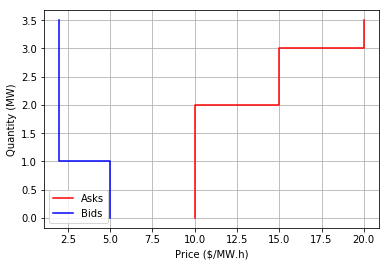

In [4]:
print(market.ask(quantity=1.5,duration=1.0,price=7.0))
print(market)
market.plot()

<order:12/BUYLIMIT FILLED 1.5MWh for -15.0$>
{"buy": [{"quantity": 1.0, "duration": 1.0, "price": 5.0, "id": 9, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 2.5, "duration": 1.0, "price": 2.0, "id": 10, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}], "sell": [{"quantity": 0.5, "duration": 1.0, "price": 10.0, "id": 5, "ordertype": "SELLLIMIT", "amount": 1.5, "value": 16.5, "divisible": true}, {"quantity": 1.0, "duration": 1.0, "price": 15.0, "id": 6, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 0.5, "duration": 1.0, "price": 20.0, "id": 7, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}], "unit": "MW", "time": "h", "currency": "$", "price": "$/MW.h", "using": {"grid": "", "legend": "['Asks','Bids']"}, "fees": 0.0, "settled": [{"quantity": 0.0, "duration": 1.0, "price": 8.0, "id": 8, "ordertype": "BUYLIMIT", "amount": 1.5, "value": -10.5, "divisible"

{'sell': [[<matplotlib.lines.Line2D at 0x113d73ac8>]],
 'buy': [[<matplotlib.lines.Line2D at 0x113d73ef0>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

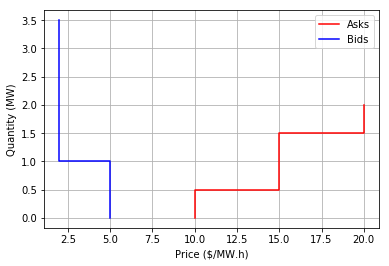

In [5]:
print(market.bid(quantity=1.5,duration=1.0,price=11.0))
print(market)
market.plot()

## Filling Market Orders
A market order is filled immediately using the corresponding book. If an order is divisible, then it may be only partly filled and the balance of the order is canceled. If the order is indivisible and it cannot be completely filled, then it is canceled.

### Examples

The following example illustrates an indivisible market buy order.

<order:13/BUYMARKET FILLED 1.0MWh for -12.5$>


{'sell': [[<matplotlib.lines.Line2D at 0x113e66cf8>]],
 'buy': [[<matplotlib.lines.Line2D at 0x113e66e48>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

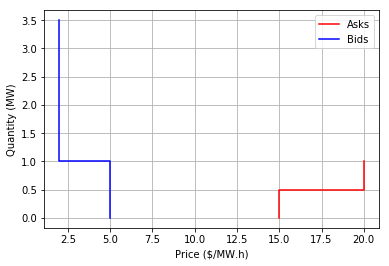

In [6]:
print(market.bid(quantity=1.0,duration=1.0))
market.plot()

The following example illustrates an market sell order.

<order:14/SELLMARKET FILLED 1.0MWh for -5.0$>


{'sell': [[<matplotlib.lines.Line2D at 0x113f5f0b8>]],
 'buy': [[<matplotlib.lines.Line2D at 0x113f5f4e0>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

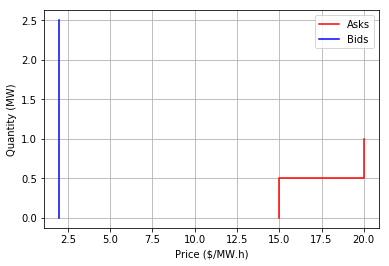

In [7]:
print(market.ask(quantity=1.0,duration=1.0))
market.plot()

The following example illustrates an attempt to less than is required by the remaining buyer. 

<order:15/CANCEL 1.0MW for 1.0h>


{'sell': [[<matplotlib.lines.Line2D at 0x11404b320>]],
 'buy': [[<matplotlib.lines.Line2D at 0x11404b710>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

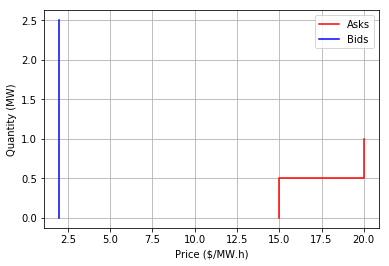

In [8]:
print(market.ask(quantity=1.0,duration=1.0))
market.plot()

# Order Duration

When an order has mismatched duration, the dispatch must be updated when the time has elapsed.  For example, if seller A places an order with a duration of 30 minutes, while matched buyer B's order duration is 1 hour, then the buyer order must be rebooked to find a new matching seller for the unfilled balance of the 30 minutes.  Until a new seller can be found the buyer's order must be suspended, and thus the buyer's order must be divisible.

A complete formulation of duration resolution is as follows:
$$
A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to \\~\\
\left\{ \begin{array}{lcl}
    Q_a < Q_b &:& 
    \left\{ \begin{array}{lcl}
        D_a < D_b &:& C(Q_a,P_c,T,D_a) + B_1(Q_b-Q_a,P_b,T,D_a) + B_2(Q_b,P_b,T+D_a,D_b-D_a)
    \\
        D_a = D_b &:& C(Q_a,P_c,T,D_a)+B_1(Q_b-Q_a,P_b,T,D_b)
    \\
        D_a > D_b &:& C(Q_a,P_c,T,D_b) + B_1(Q_b-Q_a,P_b,T,D_b) + A_1(Q_a,P_a,T+D_b,D_a-D_b)
    \end{array} \right.
\\~\\
    Q_a = Q_b &:&
    \left\{ \begin{array}{lcl}
        D_a < D_b &:& C(Q_a,P_c,T,B_1) + B_1(Q_b,P_b,T+D_a,D_b-D_b)
    \\
        D_a = D_b &:& C(Q_a,P_c,T,D_a)
    \\
        D_a > D_b &:& C(Q_a,P_c,T,D_b)+A_1(Q_a,P_a,T,D_a-D_b)
    \end{array} \right.
\\~\\
    Q_a > Q_b &:&
    \left\{ \begin{array}{lcl}
        D_a < D_b &:& C(Q_b,P_c,T,D_a) + A_1(Q_a-Q_b,P_a,T,D_a) + B_1(Q_b,P_b,T+D_a,D_b-D_a)
    \\
        D_a = D_b &:& C(Q_b,P_c,T,D_a) + A_1(Q_a-Q_b,P_a,T,D_a)
    \\
        D_a > D_b &:& C(Q_b,P_c,T,D_b) + A_1(Q_a-Q_b,P_a,T,D_b) + A_2(Q_a,P_a,T+D_b,D_a-D_b)
    \end{array} \right.
\end{array} \right.
$$

where $P_C=\frac{1}{2}P_A+\frac{1}{2}P_B$.

This can be represented schematically according to the following cases

### Case 1
$(Q_a<Q_b) \vee (D_a<D_b) \implies $

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_a,P_c,T,D_a) + B_1(Q_b-Q_a,P_b,T,D_a) + B_2(Q_b,P_b,T+D_a,D_b-D_a)$ 

### Case 2
$(Q_a<Q_b) \vee (D_a=D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_a,P_c,T,D_a)+B_1(Q_b-Q_a,P_b,T,D_b)$

### Case 3
$(Q_a<Q_b) \vee (D_a>D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_a,P_c,T,D_b) + B_1(Q_b-Q_a,P_b,T,D_b) + A_1(Q_a,P_a,T+D_b,D_a-D_b)$

### Case 4
$(Q_a=Q_b) \vee (D_a<D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_a,P_c,T,B_1) + B_1(Q_b,P_b,T+D_a,D_b-D_b)$

### Case 5
$(Q_a=Q_b) \vee (D_a=D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_a,P_c,T,D_a)$

### Case 6
$(Q_a=Q_b) \vee (D_a>D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_a,P_c,T,D_b)+A_1(Q_a,P_a,T,D_a-D_b)$

### Case 7
$(Q_a>Q_b) \vee (D_a<D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_b,P_c,T,D_a) + A_1(Q_a-Q_b,P_a,T,D_a) + B_1(Q_b,P_b,T+D_a,D_b-D_a)$

### Case 8
$(Q_a>Q_b) \vee (D_a=D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_b,P_c,T,D_a) + A_1(Q_a-Q_b,P_a,T,D_a)$

### Case 9
$(Q_a>Q_b) \vee (D_a>D_b) \implies $ 

$A(Q_a,P_a,T,D_a) + B(Q_b,P_b,T,D_b) 
\to C(Q_b,P_c,T,D_b) + A_1(Q_a-Q_b,P_a,T,D_b) + A_2(Q_a,P_a,T+D_b,D_a-D_b)$

### Examples
TODO: finish implementing this in `orderbook.py`.

<orderbook $ / MW . h>
<order:16/SELLLIMIT 1.0MW at 10.0$/MW.h for 1.0h>
<order:17/BUYMARKET FILLED 0.5MWh for -5.0$>


{'sell': [[<matplotlib.lines.Line2D at 0x1140bcba8>]],
 'buy': [[<matplotlib.lines.Line2D at 0x1140bcf98>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

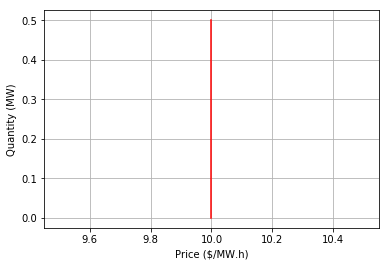

In [9]:
market = ob.orderbook(unit="MW")
print(repr(market))
print(market.ask(quantity=1.0,duration=1.0,price=10.0))
print(market.bid(quantity=0.5,duration=0.5))
market.plot(using={"grid":""})

# Ramping Services
Up to this point we have described a real-time capacity dispatch market.  We now illustrate a real-time ramping services market.

## Examples

The following example creates a ramping market and add limits orders to the market. Because the price unit is reduced from `$/(MW/h).h` to `$/MW`, the price unit is specified explicitly so that the default price unit is not used.

{"buy": [{"quantity": 1.5, "duration": 1.0, "price": 8.0, "id": 21, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 1.0, "duration": 1.0, "price": 5.0, "id": 22, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 2.5, "duration": 1.0, "price": 2.0, "id": 23, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}], "sell": [{"quantity": 2.0, "duration": 1.0, "price": 10.0, "id": 18, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 1.0, "duration": 1.0, "price": 15.0, "id": 19, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 0.5, "duration": 1.0, "price": 20.0, "id": 20, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}], "unit": "MW/h", "time": "h", "currency": "$", "price": "$/MW", "using": {}, "fees": 0.0, "settled": []}


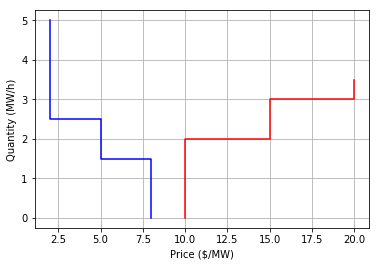

In [10]:
market = ob.orderbook(unit="MW/h",price="$/MW")
market.ask(quantity=2.0, duration=1.0, price=10.0)
market.ask(quantity=1.0, duration=1.0, price=15.0)
market.ask(quantity=0.5, duration=1.0, price=20.0)
market.bid(quantity=1.5, duration=1.0, price=8.0)
market.bid(quantity=1.0, duration=1.0, price=5.0)
market.bid(quantity=2.5, duration=1.0, price=2.0)
print(market)
graph = market.plot(using={"grid":""})

# Validation
The following cases must be validated.
- [ ] Sell limit order booking
- [ ] Divisible buy limit order booking
- [ ] Indivisible buy limit order booking
- [ ] Divisible buy limit order fill with single sell order
- [ ] Divisible buy limit order fill with multiple sell orders
- [ ] Indivisible buy limit order fill with single sell order
- [ ] Indivisible buy limit order fill with multiple sell orders
- [ ] Sell limit order fill with single buy order
- [ ] Sell limit order fill with multiple buy orders
- [ ] Divisible buy market order fill
- [ ] Indivisible buy market order fill
- [ ] Divisible buy market order fill failure
- [ ] Indivisible buy market order fill failure
- [ ] Sell market order fill
- [ ] Sell market order fill failure

The following runs the self-test routine:

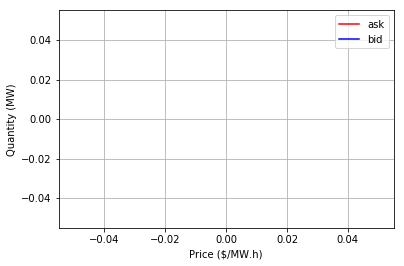

In [11]:
ob.selftest()

# Documentation

In [12]:
help('orderbook')

Help on module orderbook:

NAME
    orderbook

CLASSES
    builtins.dict(builtins.object)
        order
    builtins.object
        config
        orderbook
    builtins.str(builtins.object)
        ordertype
    
    class config(builtins.object)
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Data and other attributes defined here:
     |  
     |  debug = False
     |  
     |  warning = True
    
    class order(builtins.dict)
     |  order(**kwargs)
     |  
     |  Implementation of order
     |  
     |  Method resolution order:
     |      order
     |      builtins.dict
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, **kwargs)
     |      Initialize self.  See help(ty

# References
[1] Hammerstrom et al., "Pacific Northwest Smartgrid Demonstration Testbed", PNNL Report No. 17092, Richland WA, 2007.